In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
savepath = ''

# Load data

In [3]:
dfP = pd.read_csv(r'')

In [4]:
dfPC1 = dfP[dfP['Patent_Count'  ]>0]
dfPC2 = dfP[dfP['NCT_Count'     ]>0]
dfPC3 = dfP[dfP['Newsfeed_Count']>0]
dfPC4 = dfP[dfP['Tweet_Count'   ]>0]

In [12]:
len(dfPC2)/len(dfP)

0.0077341557202041215

# subfig a-b

In [6]:
colors = ["#212F3D","#C0392B","#1F618D","#AF601A","#117A65"]

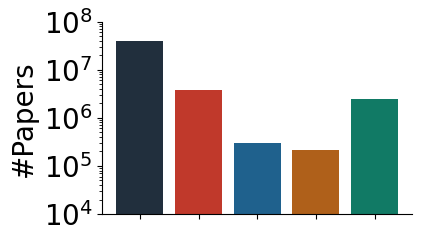

In [7]:
labellst = ['Total','for Patents','for Clinical Trials','for News','for Tweets',]
f, ax = plt.subplots(figsize=(4, 2.5))
x = [1,2,3,4,5]
d = [len(dfP),len(dfPC1),len(dfPC2),len(dfPC3),len(dfPC4),]
plt.bar(x,d,color=colors)
plt.yticks([10e5,10e6,10e7],fontsize=20,)
plt.xticks(x,['']*5,fontsize=20,)
plt.ylabel('#Papers',fontsize = 20)
plt.ylim(10e3,10e7)
ax.set_yscale("log")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig(savepath+"a.svg",bbox_inches = 'tight')

In [10]:
x = range(1950 , 2021)
y1 = dfP['Patent_Count'].groupby(dfP['Year']).count().reset_index()['Patent_Count'].values
y2 = dfPC1['Patent_Count'].groupby(dfPC1['Year']).count().reset_index()['Patent_Count'].values
y3 = dfPC2['Patent_Count'].groupby(dfPC2['Year']).count().reset_index()['Patent_Count'].values
y4 = dfPC3['Patent_Count'].groupby(dfPC3['Year']).count().reset_index()['Patent_Count'].values
y5 = dfPC4['Patent_Count'].groupby(dfPC4['Year']).count().reset_index()['Patent_Count'].values

ylst = [y1,y2,y3,y4,y5]
markerlst = ['o','v','s','P','P',]
lslst = ['solid','dotted','--','-.',':',]
labellst = ['Total','for Patents','for Clinical Trials','for News','for Tweets',]

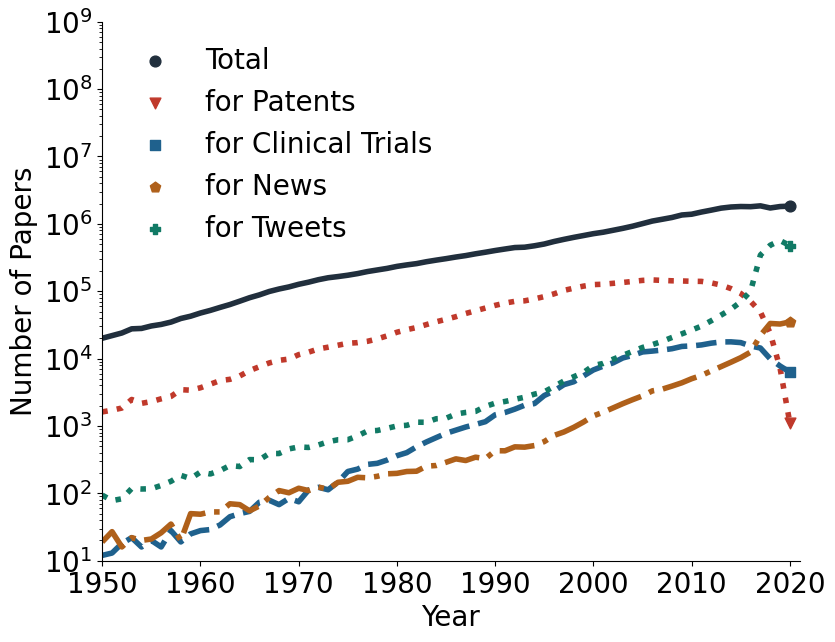

In [11]:
f, ax = plt.subplots(figsize=(9, 7))
for i in range(5):
    plt.plot(x, ylst[i],lw=4,ls=lslst[i],c=colors[i])
    plt.scatter(x[-1], ylst[i][-1], s=60,marker=markerlst[i],c=colors[i], label=labellst[i] )

plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Number of Papers',fontsize = 20)
plt.ylim(10e0,10e8)
plt.xlim(1950,2021)
ax.set_yscale("log")
plt.legend(fontsize = 20,frameon=False,loc='upper left')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig(savepath+"a2.svg",bbox_inches = 'tight')

# subfig b

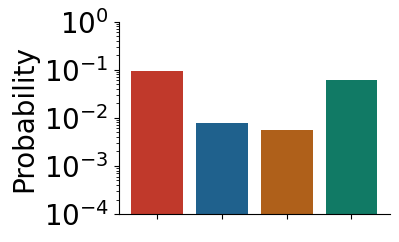

In [12]:
labellst = ['for Patents','for Clinical Trials','for News','for Tweets',]
f, ax = plt.subplots(figsize=(3.5, 2.5))
x = [1,2,3,4]
d = [len(dfPC1)/len(dfP),len(dfPC2)/len(dfP),len(dfPC3)/len(dfP),len(dfPC4)/len(dfP),]
plt.bar(x,d,color=colors[1:])
plt.yticks([10e5,10e6,10e7],fontsize=20,)
plt.xticks(x,['']*4,fontsize=20,)
plt.ylabel('Probability',fontsize = 20)
plt.ylim(.0001,1)
ax.set_yscale("log")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig(savepath+"b1.svg",bbox_inches = 'tight')

In [15]:
x = range(1950 , 2021)
y1 =   dfP.groupby(dfP['Year']  )['Patent_Count'].count().reset_index()
y2 = dfPC1.groupby(dfPC1['Year'])['Patent_Count'].count().reset_index()
y3 = dfPC2.groupby(dfPC2['Year'])['Patent_Count'].count().reset_index()
y4 = dfPC3.groupby(dfPC3['Year'])['Patent_Count'].count().reset_index()
y5 = dfPC4.groupby(dfPC4['Year'])['Patent_Count'].count().reset_index()

y2['Patent_Count'] = y2['Patent_Count']/y1['Patent_Count']
y3['Patent_Count'] = y3['Patent_Count']/y1['Patent_Count']
y4['Patent_Count'] = y4['Patent_Count']/y1['Patent_Count']
y5['Patent_Count'] = y5['Patent_Count']/y1['Patent_Count']
ylst = [y1,y2,y3,y4,y5]
markerlst = ['o','v','s','P','P',]
lslst = ['solid','dotted','--','-.',':',]
labellst = ['Total','for Patents','for Clinical Trials','for News','for Tweets',]

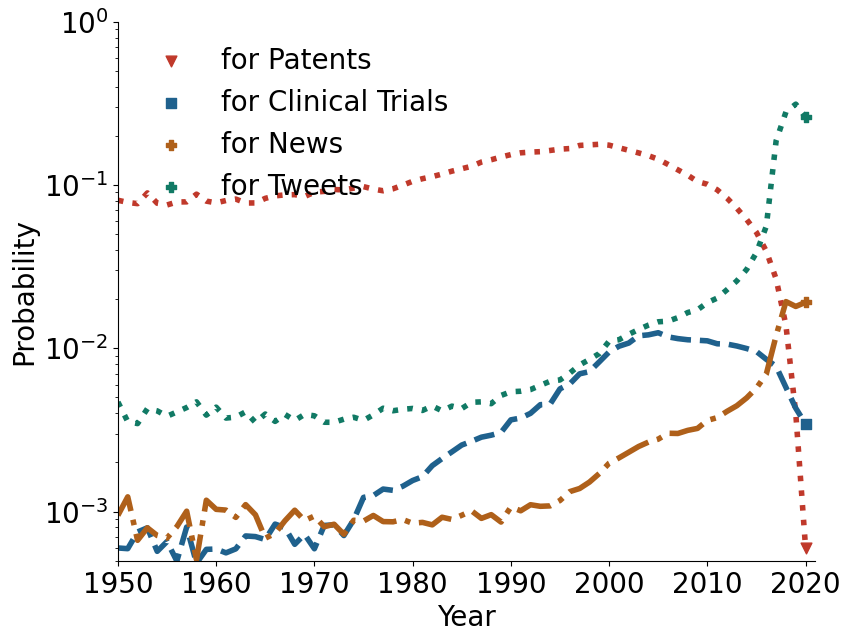

In [16]:
f, ax = plt.subplots(figsize=(9, 7))
for i in range(1,5):
    plt.plot(ylst[i]['Year'].values, ylst[i]['Patent_Count'].values,lw=4,ls=lslst[i],c=colors[i])
    plt.scatter(ylst[i]['Year'].values[-1], ylst[i]['Patent_Count'].values[-1], s=60,marker=markerlst[i],c=colors[i], label=labellst[i] )

plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Probability',fontsize = 20)
plt.ylim(0.0005,1)
plt.xlim(1950,2021)
ax.set_yscale("log")
plt.legend(fontsize = 20,frameon=False,loc='upper left')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig(savepath+"b.svg",bbox_inches = 'tight')

# subfig c

In [20]:
dfField = pd.read_csv(r'')
dfField = dfField[dfField['Field_Type']!='Sub']

In [21]:
dfField2 = dfP.groupby(['FieldID'])['Year'].count().reset_index()
dfField2.columns = ['FieldID','Count']
dfField2.sort_values('Count',inplace=True)
dfField2['Field_Name'] = dfField2['FieldID'].map(dfField.set_index('FieldID')['Field_Name'])
dfField2 = dfField2[dfField2['FieldID']!=0]

In [26]:
Fieldlst = ['Art', 'Philosophy', 'History', 'Political s.', 'Geography',
       'Business', 'Sociology', 'Economics', 'Geology',
       'Environmental s.', 'Engineering', 'Computer s.',
       'Physics', 'Mathematics', 'Psychology', 'Materials s.',
       'Chemistry', 'Biology', 'Medicine']

In [23]:
d0,d1,d2,d3,d4,d01,d02,d03,d04 = [],[],[],[],[],[],[],[],[]
for _,f in enumerate(dfField2['FieldID'].values):
    y0 = len(dfP[dfP['FieldID']==f])
    y1 = len(dfPC1[dfPC1['FieldID']==f])
    y2 = len(dfPC2[dfPC2['FieldID']==f])
    y3 = len(dfPC3[dfPC3['FieldID']==f])
    y4 = len(dfPC4[dfPC4['FieldID']==f])
    y01 = y1/y0
    y02 = y2/y0
    y03 = y3/y0
    y04 = y4/y0
    d0.append(y0)
    d1.append(y1)
    d2.append(y2)
    d3.append(y3)
    d4.append(y4)
    d01.append(y01)
    d02.append(y02)
    d03.append(y03)
    d04.append(y04)

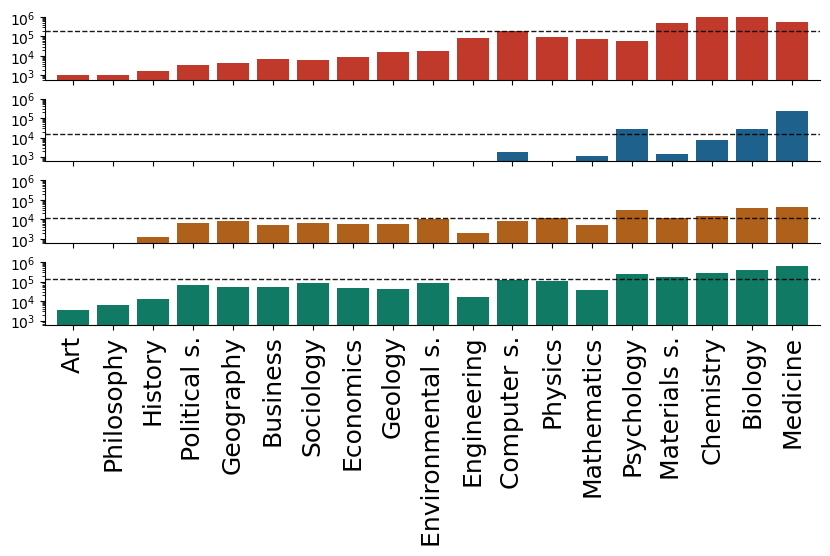

In [27]:
plt.subplots(4,1,figsize=(10,4))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.3)

for _,d in enumerate([d1,d2,d3,d4]):
    ax = plt.subplot(4,1, _+1)
    plt.bar(range(19) , d, capsize = 3, color = colors[_+1])
    plt.ylim(600,1000000)
    plt.xlim(-.7,18.7)
    plt.axhline(y = np.mean(d) , c = 'black',alpha=.9, linestyle = '--', lw = 1)
    plt.yticks(fontsize=10,)
    if _==3:
        plt.xticks(range(19),Fieldlst,fontsize=18,rotation=90)
    else:
        plt.xticks(range(19),['']*19,fontsize=0)
    ax.set_yscale("log")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(savepath+"c1.svg",bbox_inches = 'tight')

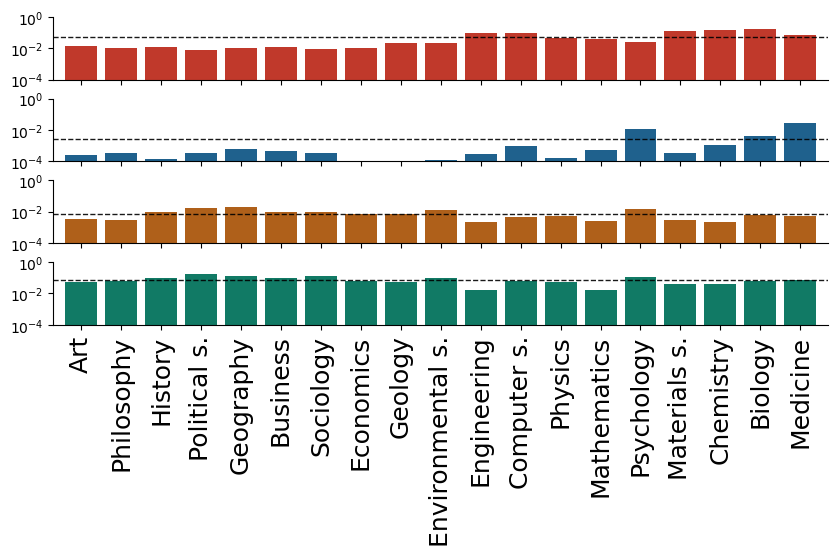

In [28]:
plt.subplots(4,1,figsize=(10,4))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.3)

for _,d in enumerate([d01,d02,d03,d04]):
    ax = plt.subplot(4,1, _+1)
    plt.bar(range(19) , d, capsize = 3, color = colors[_+1])
    plt.ylim(.0001,1)
    plt.xlim(-.7,18.7)
    
    plt.yticks(fontsize=10,)
    plt.axhline(y = np.mean(d) , c = 'black',alpha=.9, linestyle = '--', lw = 1)
    if _==3:
        plt.xticks(range(19),Fieldlst,fontsize=18,rotation=90)
    else:
        plt.xticks(range(19),['']*19,fontsize=0)
    ax.set_yscale("log")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(savepath+"c2.svg",bbox_inches = 'tight')